
# <center><font color='MediumSeaGreen'>Desafío - Pruebas de hipótesis</font><center>

### <center><b> Bárbara Pérez </b><center>

___

## <font color='MediumSeaGreen'>Descripción</font>

A partir del trabajo realizado en el Desafío anterior, la empresa para la cual trabajas, te ha solicitado continuar el análisis de datos pero, está vez, evaluando juicios de hipótesis e implementando funciones que faciliten el análisis de datos.

Para ello, te entregan un material de apoyo el cual deberá servir como base para desarrollar los siguientes requerimientos.

____

## <font color='MediumSeaGreen'>Requerimientos</font> 

A continuación revisaremos los requerimientos y acciones que la empresa a la cual postulas te pide realizar.

<b><font color='MediumSeaGreen'>1.</font> Evaluar juicios de hipótesis (2 punto):</b> para evaluar la pertinencia de diversas hipótesis, se te solicita discernir si es posible rechazar la hipótesis nula.


- *75 individuos elegidos al azar fueron alcanzados por activistas pro-LGTB que se identificaron como homosexuales, y 75 alcanzados por activistas pro-LGTB que se identificaron como heterosexuales. El objetivo era medir actitudes frente a la adopción homoparental. La organización encargada de procesar los datos obtuvo los siguientes resultados:*


    - El 67% de los encuestados por heterosexuales se mostró a favor de la adopción homoparental, mientras que un 72% de los encuestados por activistas que se identificaron como homosexuales se mostraron a favor de la adopción homoparental.
    
    
    - Asumiendo que la hipótesis nula es que ambos porcentajes no son diferentes, y la hipótesis alternativa es que existe una diferencia substancial entre ambos.
    
 
    - Con p-valor de 0.1183 ¿es posible rechazar la hipótesis nula en favor de la alternativa con una confianza de 95%?, ¿Cuanta es la confianza máxima con a que sería posible rechazar la hipótesis nula en favor de la alternativa con estos resultados?


### **Respuesta**
Siendo el p-value de 0.1183 y para poder rechazar la hipotesis nula se debe restar 1 menos p-value (1 - p-value), es igual a **1 - 0.1183 = 0.8817**, por lo tanto **tiene 88.17% de confianza estadistica**.

No es posible rechazar la hipotesis nula, ya que la confianza estadistica no alcanza a superar el 95%

___

<b><font color='MediumSeaGreen'>2.</font> Importar la base de datos utilizada la sesión presencial anterior (2 puntos):</b>

- Agregue una serie de variables binarias por cada continente de la variable 'region'

**Tip:** Utilice <span style='background:gainsboro'><font color='dimgray'>np.where</font></span> para ello.


- De manera similar a la sesión anterior, enfóquese en las siguientes variables:

    - Apellidos desde la A hasta la N: Enfocarse en las variables <span style='background:gainsboro'><font color='dimgray'>chldmort</font></span>, <span style='background:gainsboro'><font color='dimgray'>adfert</font></span> y <span style='background:gainsboro'><font color='dimgray'>life</font></span>
    
    - Apellidos desde la N hasta la Z: Enfocarse en las variables <span style='background:gainsboro'><font color='dimgray'>femlab</font></span>, <span style='background:gainsboro'><font color='dimgray'>literacy</font></span> y <span style='background:gainsboro'><font color='dimgray'>school</font></span>.

In [2]:
#Importar librerias
import pandas as pd #Version: 1.4.3
import numpy as np #Version: 1.23.0
import matplotlib.pyplot as plt #Version: 3.5.2
import scipy.stats as stats #Version: 1.8.1 
import seaborn as sns #Version: 0.11.2

In [3]:
df = pd.read_csv('nations.csv', encoding = 'latin-1')
#encoding = 'latin-1' --> Sin esta informacion entregaba un error

In [46]:
df.head()

,Unnamed: 0,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
0,1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN
1,2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN
2,3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN
3,4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN
4,5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999


In [47]:
#Función binaria por cada continente de la variable

def columnas_binarias(dataframe, columna):
    valor_colum= dataframe[columna].unique()
    for i in valor_colum:
        dataframe[i] = np.where(dataframe[columna]==i, 1, 0) #Se coloca un cero si no pertenece a esa region y un 1 cuando pertenece

In [48]:
#creo una copia del dataframe original

df2 = df.copy()

df2.head()

,Unnamed: 0,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
0,1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN
1,2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN
2,3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN
3,4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN
4,5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999


In [73]:
#binarizo las regiones solicitadas
columnas_binarias(df2, 'region')

In [105]:
#Variable que guarda los nombres de regiones
reg_bin = df2['region'].unique()
reg_bin

array(['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'], dtype=object)

In [75]:
#Compruebo el resultado con la variable creada
df2.sample(5)[np.append(['region'], reg_bin)]

,region,Africa,Americas,Asia,Europe,Oceania
22,Africa,1,0,0,0,0
57,Americas,0,1,0,0,0
107,Asia,0,0,1,0,0
1,Africa,1,0,0,0,0
33,Africa,1,0,0,0,0


**De manera similar a la sesión anterior**, enfóquese en las siguientes variables

- Apellidos desde la N hasta la Z: Enfocarse en las variables **femlab, literacy y school.**

In [90]:
#De manera similar a la sesion anterior nos enfocaremos en las variables dichas por el profesor y 
#veremos si tienen o no correlación


In [95]:
#obtenemos el listado de variables
principales_correlaciones = ['region','femlab','literacy','school']
#creamos el subset que contendrá las variables con las correlaciones mas significativas
df_principales_correlaciones = df.loc[:, principales_correlaciones]

In [96]:
#verificamos el contenido del subset
df_principales_correlaciones.sample(10)

,region,femlab,literacy,school
80,Americas,0.6622,NaN,8.300000
174,Europe,0.7026,97.699997,10.033333
140,Europe,0.7590,NaN,10.733334
28,Africa,0.9520,73.699997,3.816667
126,Asia,0.2592,84.199997,5.700000
94,Asia,0.8684,77.599998,5.733333
58,Americas,0.7232,89.800003,6.883333
111,Asia,0.5544,92.500000,9.233334
182,Oceania,NaN,NaN,7.800000
48,Africa,0.3568,77.599998,6.066667


In [97]:
#obtenemos las regiones
regiones = df_principales_correlaciones['region'].value_counts()
regiones

Africa      52
Asia        49
Europe      43
Americas    35
Oceania     15
Name: region, dtype: int64

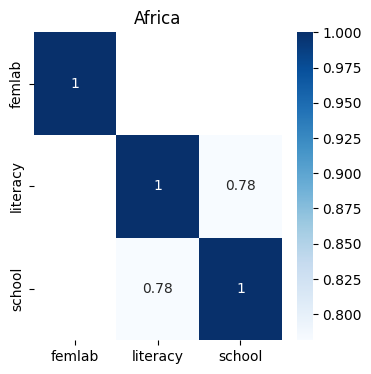

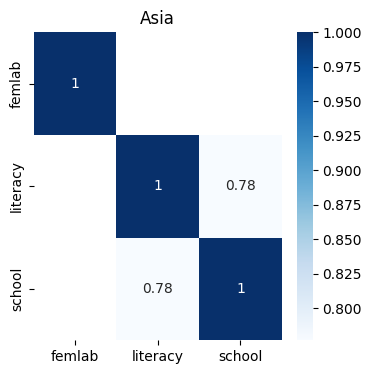

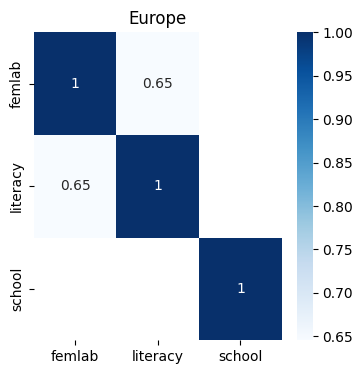

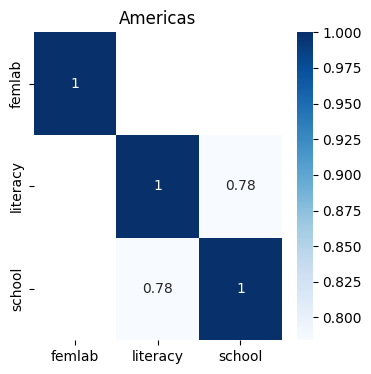

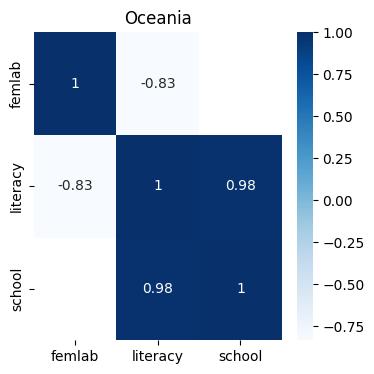

In [98]:
#iteramos sobre las regiones
for i in regiones.index:
    corr_mat = df_principales_correlaciones[df_principales_correlaciones['region'] == i].corr()
    #filtramos por criterio de corte .6
    corr_mat = corr_mat[(corr_mat > 0.6) | (corr_mat < -0.6)]
    plt.figure(figsize = (4,4))
    ax = plt.axes()
    ax.set_title(i)
    sns.heatmap(corr_mat, cmap='Blues', annot=True, ax = ax)

______

<b><font color='MediumSeaGreen'>3.</font> Implementar una función de prueba de hipótesis a mano (3 puntos):</b>

La función debe ingresar los siguientes argumentos:

- <span style='background:gainsboro'><font color='dimgray'>df:</font></span> La tabla de datos.

- <span style='background:gainsboro'><font color='dimgray'>variable:</font></span> La variable a analizar.

- <span style='background:gainsboro'><font color='dimgray'>binarize:</font></span> El indicador binario a utilizar.

***Tip:***

❖ *Separe la variable en dos, utilizando el indicador binario. Recuerde eliminar los perdidos con <span style='background:gainsboro'><font color='dimgray'>dropna()</font></span>.*

❖ *Implemente <span style='background:gainsboro'><font color='dimgray'>ttest_ind</font></span> de <span style='background:gainsboro'><font color='dimgray'>scipy.stats</font></span> y guarde el valor <span style='background:gainsboro'><font color='dimgray'>t</font></span> y <span style='background:gainsboro'><font color='dimgray'>pval</font></span>.*

❖ *Reporte las medias para cada grupo (0 y 1).*

❖ *Reporte la diferencia de entre las medias.*



In [136]:
#Creamos una nueva funcion
def prueba_hipotesis (dataframe, variable, binarize):
    df_1= dataframe[dataframe[binarize]==1]
    df_0= dataframe[dataframe[binarize]==0]
    test= stats.ttest_ind(df_1[variable].dropna(), df_0[variable].dropna())
    t_valor= round(test[0],6)
    p_valor= round(test[1],6)
    media1 = round (df_1[variable].mean(),2)
    media0 = round (df_0[variable].mean(),2)
    dif_absoluta_de_medias = round(abs(media0-media1),3)
    
    print(f"""Variable: {variable}
    Indicador de binzarizacion: {binarize}
    media grupo 0: {media0}, media grupo 1: {media1}
    diferencia absoluta entre las medias: {dif_absoluta_de_medias}
    valor t: {t_valor}
    valor p: {p_valor}\n\n""")


In [137]:
variables_bpr = ['femlab','literacy','school']

for i in variables_bpr:
    for continente in reg_bin:
        prueba_hipotesis (df2, i, continente)

Variable: femlab
    Indicador de binzarizacion: Africa
    media grupo 0: 0.68, media grupo 1: 0.73
    diferencia absoluta entre las medias: 0.05
    valor t: 1.783873
    valor p: 0.076177


Variable: femlab
    Indicador de binzarizacion: Americas
    media grupo 0: 0.7, media grupo 1: 0.65
    diferencia absoluta entre las medias: 0.05
    valor t: -1.373111
    valor p: 0.171475


Variable: femlab
    Indicador de binzarizacion: Asia
    media grupo 0: 0.72, media grupo 1: 0.61
    diferencia absoluta entre las medias: 0.11
    valor t: -3.74552
    valor p: 0.000244


Variable: femlab
    Indicador de binzarizacion: Europe
    media grupo 0: 0.67, media grupo 1: 0.77
    diferencia absoluta entre las medias: 0.1
    valor t: 3.063524
    valor p: 0.002534


Variable: femlab
    Indicador de binzarizacion: Oceania
    media grupo 0: 0.69, media grupo 1: 0.72
    diferencia absoluta entre las medias: 0.03
    valor t: 0.534662
    valor p: 0.593562


Variable: literacy
    Indicad

________

<b><font color='MediumSeaGreen'>4.</font> Implementar una función que grafique los histogramas para ambas muestras (3 puntos)</b>

- Genere una función que devuelva un gráfico donde visualice los dos histogramas cuando la variable es 1 y 0, respectivamente.

***Tip:*** *Refactorize la función incluyendo el método <span style='background:gainsboro'><font color='dimgray'>hist</font></span> de <span style='background:gainsboro'><font color='dimgray'>matplotlib.pyplot</font></span>.*

*Incluya los argumentos alpha y label*

- Para las tres variables de interés acorde a su grupo, analice las diferencias de medias por cada continente, y posteriormente grafique. Concluya con los principales resultados al respecto.

In [184]:
#Generar una nueva funcion
def grafica_de_histogramas (dataframe, variable, binarize):
    
    histograma1 = dataframe[dataframe[binarize]==1][variable].dropna()
    histograma0 = dataframe[dataframe[binarize]==0][variable].dropna()
    
    plt.subplot(1,2,1)
    plt.hist(histograma1, alpha=.7, label="hola", color='tomato')
    plt.xlabel(f"{variable} con {binarize} = 1")
    plt.axvline(np.mean(histograma1))
    
    plt.subplot(1,2,2)
    plt.hist(histograma0, alpha=.7, color='blue')
    plt.xlabel(f"{variable} con {binarize} = 0")
    plt.axvline(np.mean(histograma0))    
    
    plt.show()

Segun los resultados anteriores podemos observar:

- Variable **'femlab'** con continente **'Africa'**=> *valor t*: 1.78 y *valor p*: 0.08


- Variable **'femlab'** con continente **'Americas'**=> *valor t*:-1.37 y *valor p*:0.17


- Variable **'femlab'** con continente **'Asia'**=> *valor t*: -3.75 y *valor p*: 0.0


- Variable **'femlab'** con continente **'Europe'**=> *valor t*: 3.06 y *valor p*: 0.0


- Variable **'femlab'** con continente **'Oceania'**=> *valor t: 0.53* y
    *valor p*: 0.59


- Variable **'literacy'** con continente **'Africa'** => *valor t*: -8.91 y
    *valor p*: 0.0


- Variable **'literacy'** con continente **'Americas'** =>
    *valor t*: 1.95 y
    *valor p*: 0.05


- Variable **'literacy'** con continente **'Asia'** =>
    *valor t*: 2.33 y
    *valor p*: 0.02


- Variable **'literacy'** con continente **'Europe'** =>
    *valor t*: 4.72 y
    *valor p*: 0.0


- Variable **'literacy'** con continente **'Oceania'** =>
    *valor t*: 0.05 y
    *valor p*: 0.96


- Variable **'school'** con continente **'Africa'** =>
    *valor t*: -10.42 y
    *valor p*: 0.0


- Variable **'school'** con continente **'Americas'** =>
    *valor t*: 1.36 y
    *valor p*: 0.17


- Variable **'school'** con continente **'Asia'** =>
    *valor t*: -0.54 y
    *valor p*: 0.59 


- Variable **'school'** con continente **'Europe'** =>
    *valor t*: 8.52 y
    *valor p*: 0.0


- Variable **'school'** con continente **'Oceania'**=>
    *valor t: 1.59* y
    *valor p*: 0.11


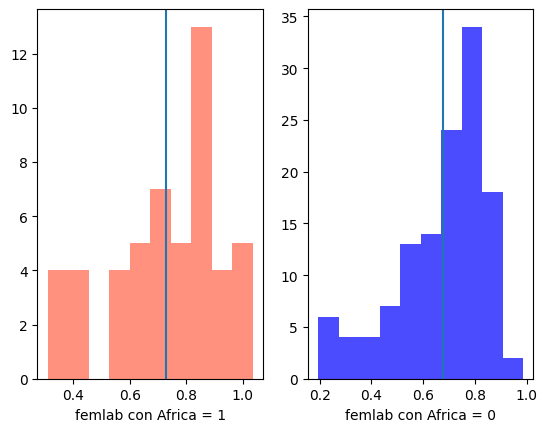

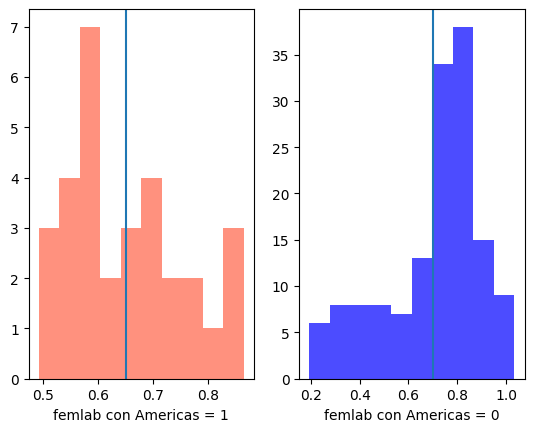

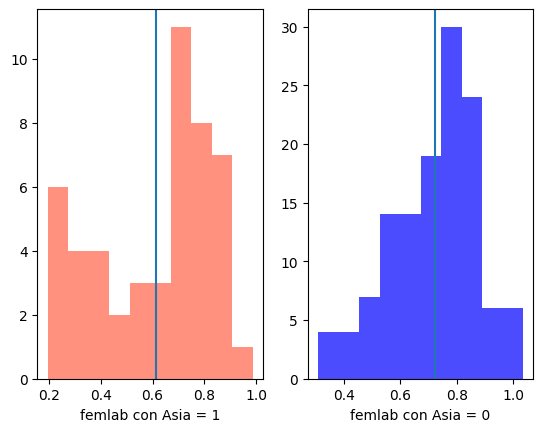

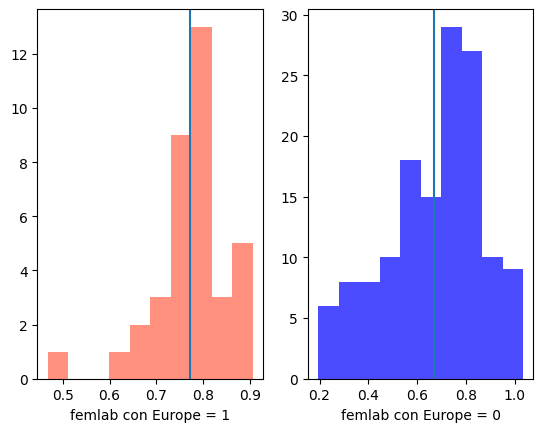

In [186]:
grafica_de_histogramas (df2, 'femlab', 'Africa')

grafica_de_histogramas (df2, 'femlab', 'Americas')

grafica_de_histogramas (df2, 'femlab', 'Asia')

grafica_de_histogramas (df2, 'femlab', 'Europe')

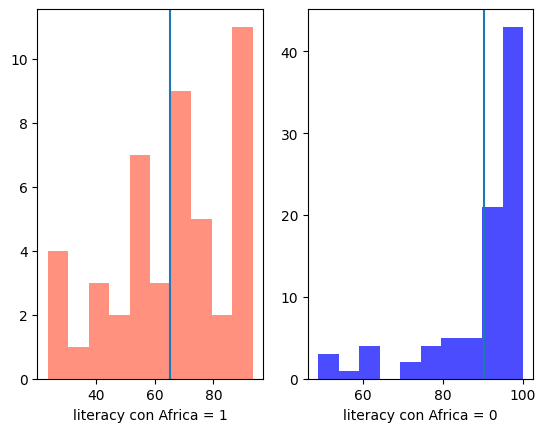

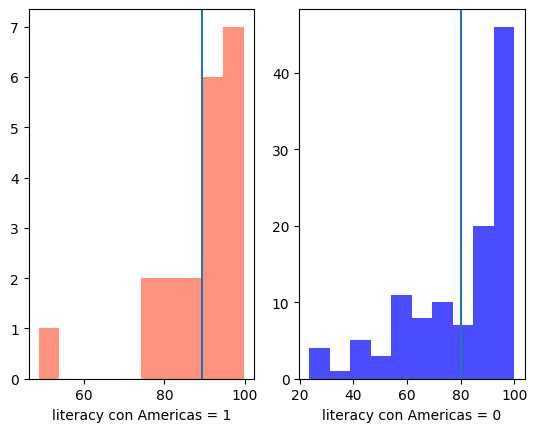

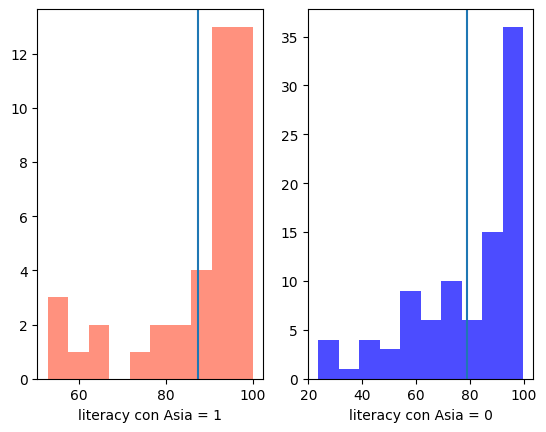

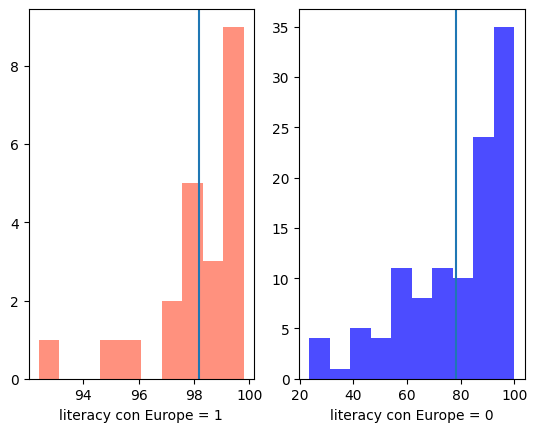

In [187]:
grafica_de_histogramas (df2, 'literacy', 'Africa')

grafica_de_histogramas (df2, 'literacy', 'Americas')

grafica_de_histogramas (df2, 'literacy', 'Asia')

grafica_de_histogramas (df2, 'literacy', 'Europe')

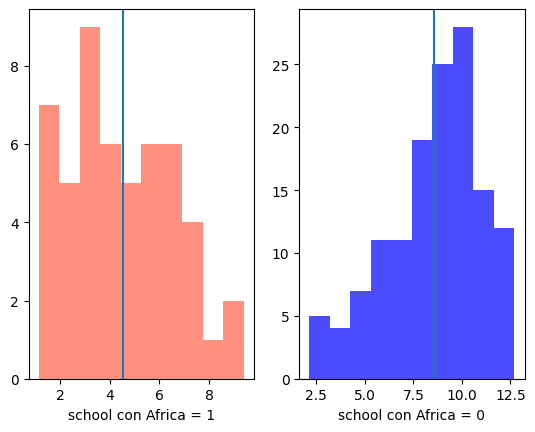

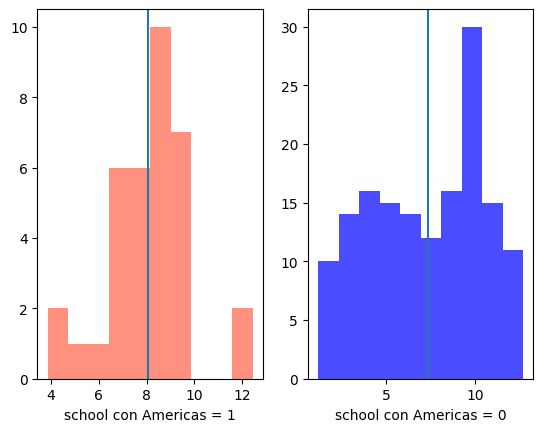

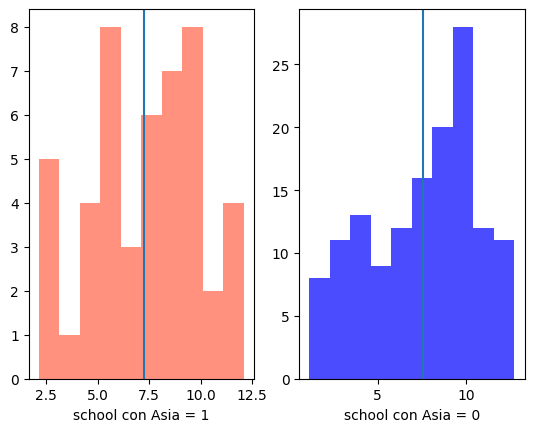

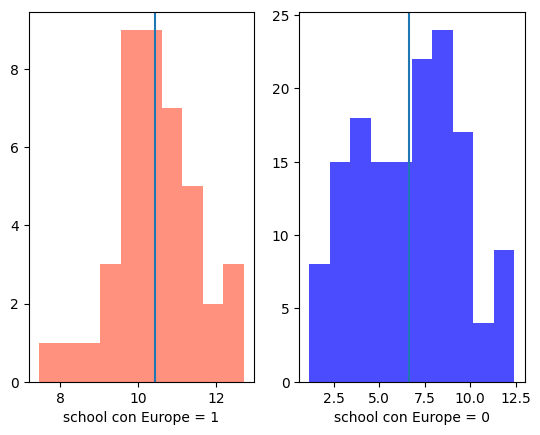

In [188]:
grafica_de_histogramas (df2, 'school', 'Africa')

grafica_de_histogramas (df2, 'school', 'Americas')

grafica_de_histogramas (df2, 'school', 'Asia')

grafica_de_histogramas (df2, 'school', 'Europe')